# Exploratory Data Analysis

**Dataset:** Airline Flight Status
**Objective:** Identify features for modeling flight delay

## Setup

In [55]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

/var/folders/4r/hqn7768143q5c174m4198rvw0000gn/T/ipykernel_73619/1676094575.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## Load Data

Assumptions:
- csv is full dataset
- flight per row
- target variable known

In [56]:
from pathlib import Path

data_dir = Path("../data")
df = pd.read_csv(data_dir / "Airline Dataset Updated - v2.csv")

# confirm data loaded
df.shape
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


## Dataset Overview

Begin by inspecting dataset size and basic statistics to find any obvious issues.

In [57]:
df.info()
df.isna().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

Passenger ID            98619
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98605
Flight Status               3
dtype: int64

**Observation**
- *98,619* rows and *15* columns
- Nationality, Airport Name, Arrival Airport have a large cardinality (240, 9062, 9024 respectively). Potentially could decrease cardinality of nationality by continent.
- Considering splitting the Departure Date into month/day
- Features like ID, Name, and Gender might not have much of an impact on the target.

## Data Quality
We examine missing values and other issues that could affect modeling.

**Findings**
- No feature has any missing values


**Implications**
- No need to drop/encode/impute any feature

## Univariate Analysis

In [58]:
df["Flight Status"].value_counts()
df["Flight Status"].value_counts(normalize=True)
#sns.histplot(data=df, x=df["Flight Status"])

Flight Status
Cancelled    0.334033
On Time      0.333060
Delayed      0.332907
Name: proportion, dtype: float64

**Observation**
- Over 66% of flights are NOT on time
- Balanced distribution of flight status

**Interpretation**
- Since this dataset is synthetic from Kaggle and the target is distrubuted equally, the model and its results won't be completely reflective of real-life scenarios.

In [59]:
df["Airport Continent"].value_counts(normalize=True)


Airport Continent
NAM    0.324816
AS     0.188980
OC     0.140602
EU     0.125077
AF     0.111845
SAM    0.108681
Name: proportion, dtype: float64

In [60]:
counts= df["Airport Country Code"].value_counts()

print(f"Total Airport Country Codes: {len(counts)}")
print(f"Median size: {counts.median()}")
print(f"Categories with < 10 samples: {(counts < 10).sum()}")

Total Airport Country Codes: 235
Median size: 122.0
Categories with < 10 samples: 11


In [70]:
counts= df["Airport Name"].value_counts()

print(f"Total Airport Names: {len(counts)}")
print(f"Median size: {counts.median()}")
print(f"Categories with < 20 samples: {(counts < 20).sum()}")

Total Airport Names: 9062
Median size: 11.0
Categories with < 20 samples: 8941


In [62]:
counts= df["Country Name"].value_counts()

print(f"Total Country Names: {len(counts)}")
print(f"Median size: {counts.median()}")
print(f"Categories with < 10 samples: {(counts < 10).sum()}")

Total Country Names: 235
Median size: 122.0
Categories with < 10 samples: 11


In [71]:
counts= df["Arrival Airport"].value_counts()

print(f"Total Arrival Airports: {len(counts)}")
print(f"Median size: {counts.median()}")
print(f"Categories with < 20 samples: {(counts < 20).sum()}")

Total Arrival Airports: 9024
Median size: 11.0
Categories with < 20 samples: 8932


<Axes: xlabel='Age', ylabel='Count'>

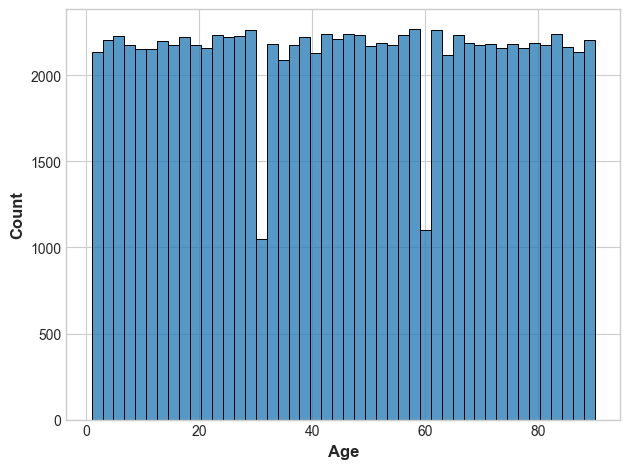

In [64]:
df["Age"].describe()
sns.histplot(data=df, x=df["Age"])

## Feature-Target Relationships

An important aspect to note is that every feature is categorical except for 'Age'. Hence, will focus on stacked barplot and mosaic plots.

In particular, I will be focusing on Airport Name, Arrival Airport, Depature Date, and Continent

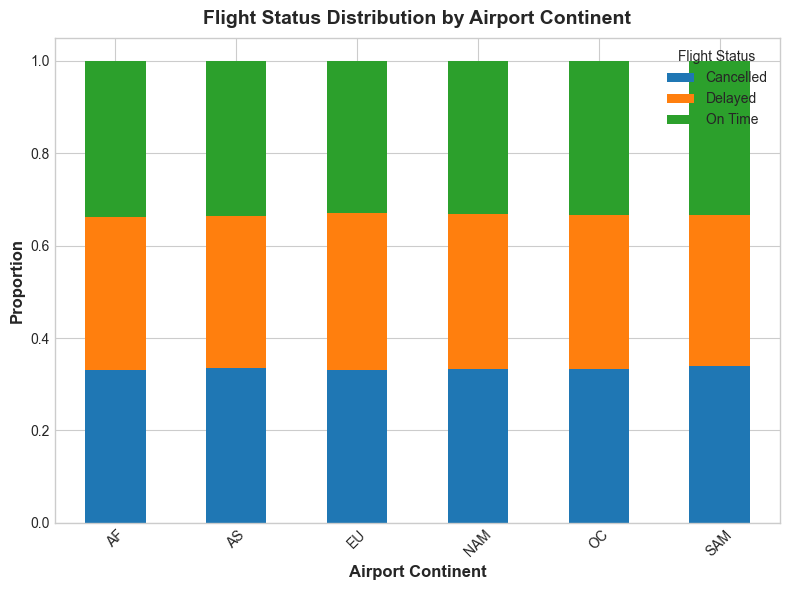

In [65]:
target = "Flight Status"
feature = "Airport Continent"
ct = pd.crosstab(df[feature], df[target], normalize="index")
ct.plot(kind="bar", stacked=True, figsize=(8,6))
plt.ylabel("Proportion")
plt.title(f"{target} Distribution by {feature}")
plt.xticks(rotation=45)
plt.legend(title=target)
plt.show()


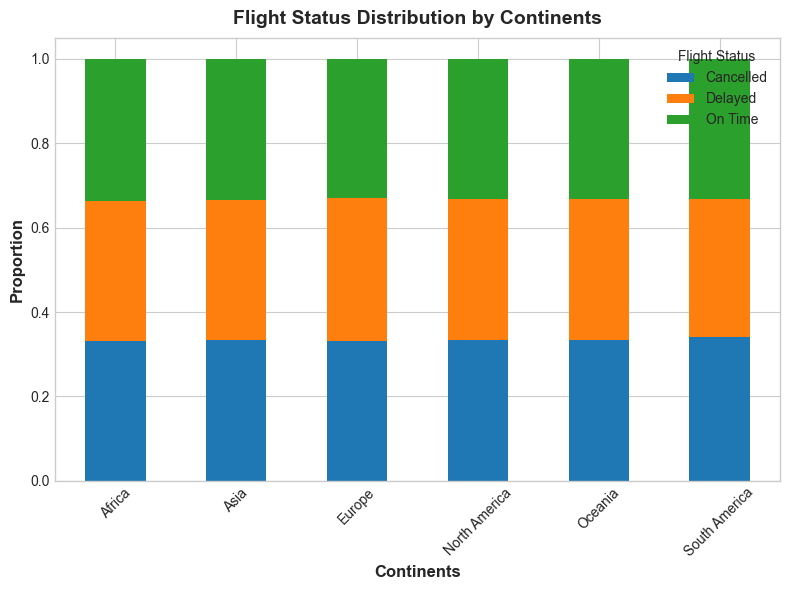

In [66]:
feature = "Continents"
ct = pd.crosstab(df[feature], df[target], normalize="index")
ct.plot(kind="bar", stacked=True, figsize=(8,6))
plt.ylabel("Proportion")
plt.title(f"{target} Distribution by {feature}")
plt.xticks(rotation=45)
plt.legend(title=target)
plt.show()

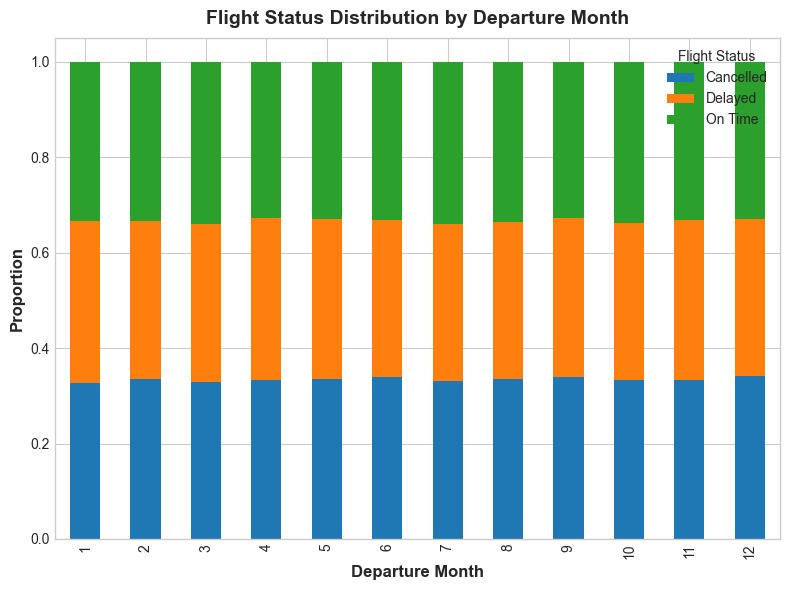

In [67]:
df["Departure Date"].head(10)
# dash = df["Departure Date"].str.contains("-").sum()
# slash = df["Departure Date"].str.contains("/").sum()
# print(dash + slash) -> equals the total number of dates
# -> all dates are a mix of dash and slash format
parsed = pd.to_datetime(df["Departure Date"], format="mixed", errors="coerce")
parsed.isna().sum()

month = parsed.dt.month

ct = pd.crosstab(month, df["Flight Status"], normalize="index")
ct.sort_index().plot(kind="bar", stacked=True, figsize=(8,6))
plt.ylabel("Proportion")
plt.xlabel("Departure Month")
plt.title("Flight Status Distribution by Departure Month")
plt.show()


**Assumption**
- A key assumption for this is that all the dates followed Month-Day-Year format (in which case 01/03/2022 would be Jan. 3)

**Observation**
- Noticing that there is a lot of balance between the proportion of the target when observed by airport continent and month.
- Suggests that these features are independent or that there was heavy amount of engineering the dataset since it is synthetic.


**Hypothesis**
- Interactions between features will potentially be more important.


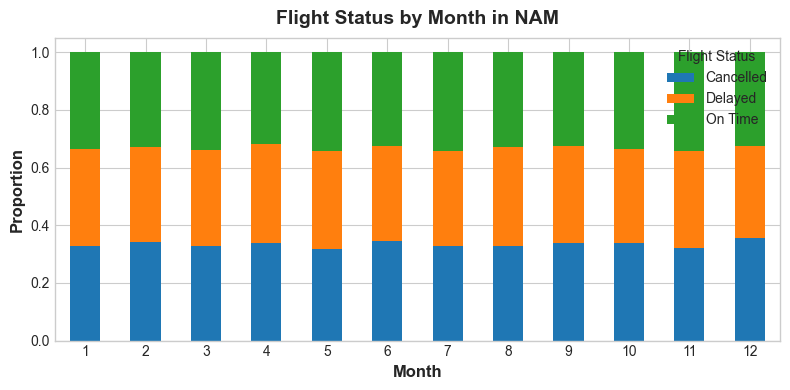

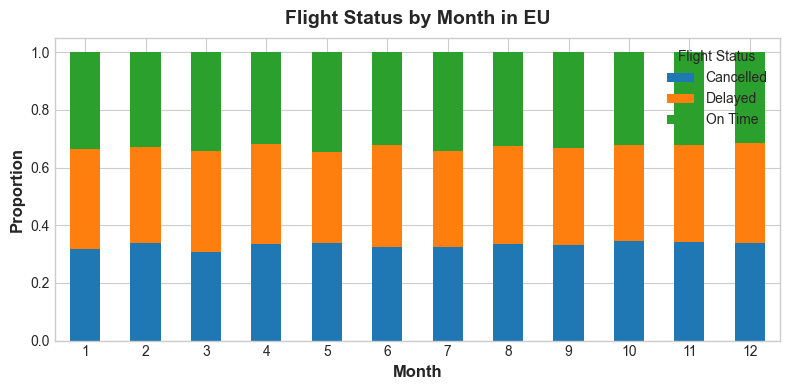

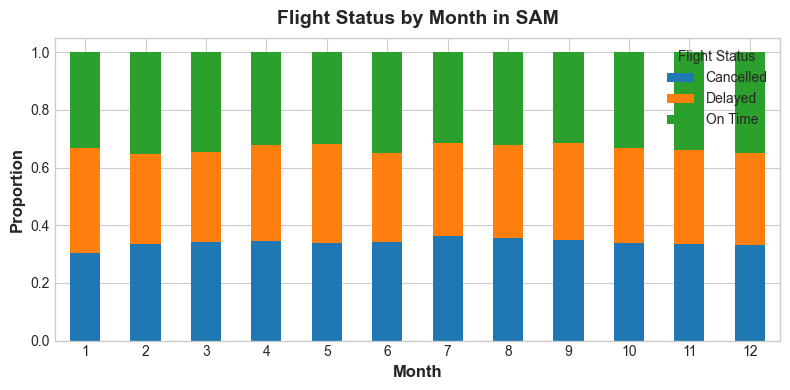

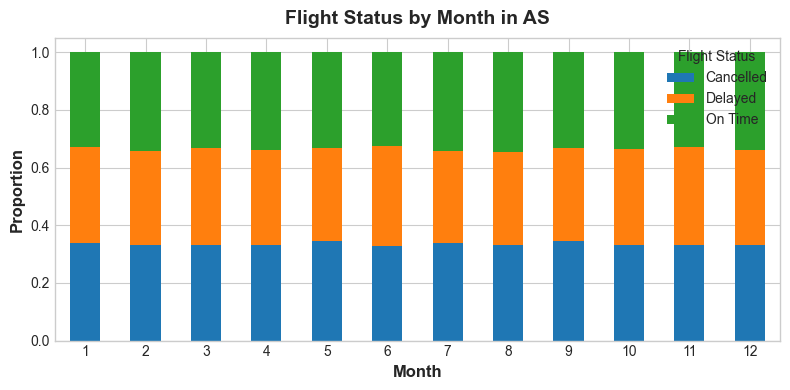

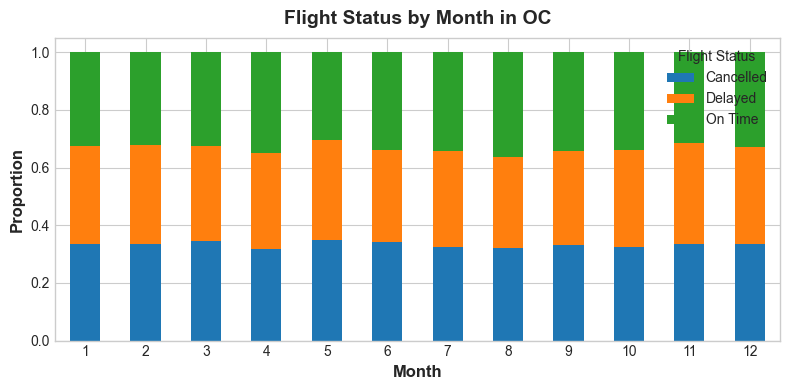

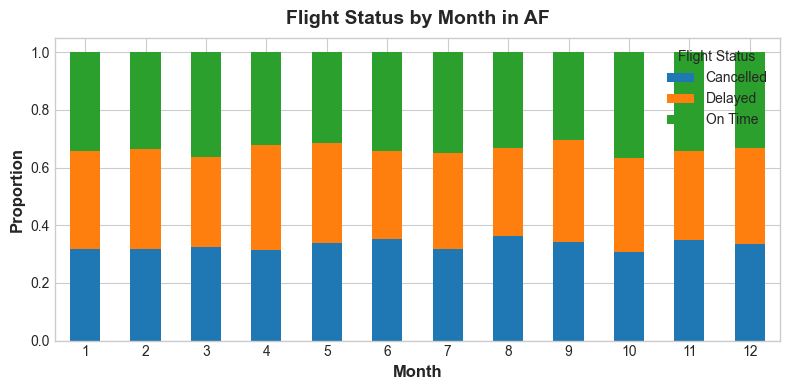

In [68]:
df_temp = df.copy()
df_temp["Month"] = month

ct = pd.crosstab(
    [df_temp["Airport Continent"], df_temp["Month"]],
    df_temp["Flight Status"],
    normalize="index"
)

continents = df_temp["Airport Continent"].unique()
for cont in continents:
    subset = ct.loc[cont]
    
    subset.plot(kind="bar", stacked=True, figsize=(8,4))
    plt.title(f"Flight Status by Month in {cont}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.show()


**Observations**
- There seems to be more variance in the target but it is still minimal

This could imply that the target is not dependent on the features and is random.

## Summary & Next Steps

**Insights**
- There are clearly some useless features for predicting flight status
    - *Passenger ID*
    - *First Name*
    - *Last Name*
    - *Pilot Name*

- The high-cardinality of multiple features and sparsity of certain categories will be a constraint.

- It appears that the dataset is synthetic as the balance for the target remains equal throughout different features. Especially since real world airline data would not have this much uniformity between status.

- To predict the target, it will be important to consider the interactions between features. If there is predictive aspect to these features but might be extremely conditional or weak.

- The target seems to not be strongly dependent on the features. Might be difficult to create a model with high accuracy.

**Next Steps**
- Split data into training and test sets
- Preprocess data with some encoding
- Build baseline model